# Prédiction des mêmes chansons

Import des librairies utiles

In [1]:
import pandas as pd
import psycopg2
import util
import numpy as np
import matplotlib.pyplot as plt

# Connexion à la base de données locale
conn = psycopg2.connect(host="localhost",
                        database="NOPLP",
                        user="postgres",
                        password="Objectifcentrale2019!")
cur = conn.cursor()

In [2]:
dateSimule = input("Entrer la date au format 'yyyy-MM-dd' : ")

Chargement des données dans un dataframe

In [16]:
df = pd.read_sql_query('SELECT titre, artiste, "année",	nb_mots, "clusterID", (SELECT AVG(laps) FROM public."LapsMCDP"(titre,' + dateSimule + ')) AS MCDPmoy, (SELECT laps FROM public."LapsMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCDP, (SELECT AVG(laps) FROM public."LapsMCMCDP"(titre,' + dateSimule + ')) AS MCMCDPmoy, (SELECT laps FROM public."LapsMCMCDP"(titre,' + dateSimule + ') LIMIT 1 ) AS MCMCDP, public."DeltaDate"(titre, ' + dateSimule + ',' + dateSimule + '), public."DeltaDateMC"(titre, ' + dateSimule + ',' + dateSimule + ') FROM public."MêmesChansons"',con=conn)
df

,titre,artiste,année,nb_mots,clusterID,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC
0,L'aigle noir,Barbara,1970.0,275.0,4,51.000000,74.0,185.500000,204.0,26.0,123.0
1,Aller plus haut,Arena Tina,1999.0,137.0,1,41.000000,26.0,300.000000,278.0,45.0,115.0
2,Tous les cris les S.O.S.,Balavoine Daniel,1985.0,298.0,4,127.000000,92.0,257.000000,257.0,28.0,65.0
3,On dirait,Amir,2016.0,338.0,1,45.200000,25.0,117.250000,91.0,35.0,102.0
4,Pull marine,Adjani Isabelle,1983.0,226.0,1,57.750000,83.0,218.333333,138.0,135.0,52.0
...,...,...,...,...,...,...,...,...,...,...,...
537,Le pouvoir des fleurs,Voulzy Laurent,1993.0,NaN,1,87.000000,142.0,200.666667,328.0,114.0,149.0
538,La plus belle pour aller danser,Vartan Sylvie,1964.0,163.0,1,58.500000,83.0,163.500000,134.0,190.0,107.0
539,Le coup de folie,Pastor Thierry,1981.0,190.0,2,162.000000,162.0,NaN,NaN,17.0,56.0
540,Chanter pour ceux qui sont loin de chez eux,Berger Michel,1985.0,226.0,1,127.666667,75.0,188.000000,245.0,12.0,46.0


Histogramme des écarts même chanson dernier passage moyens

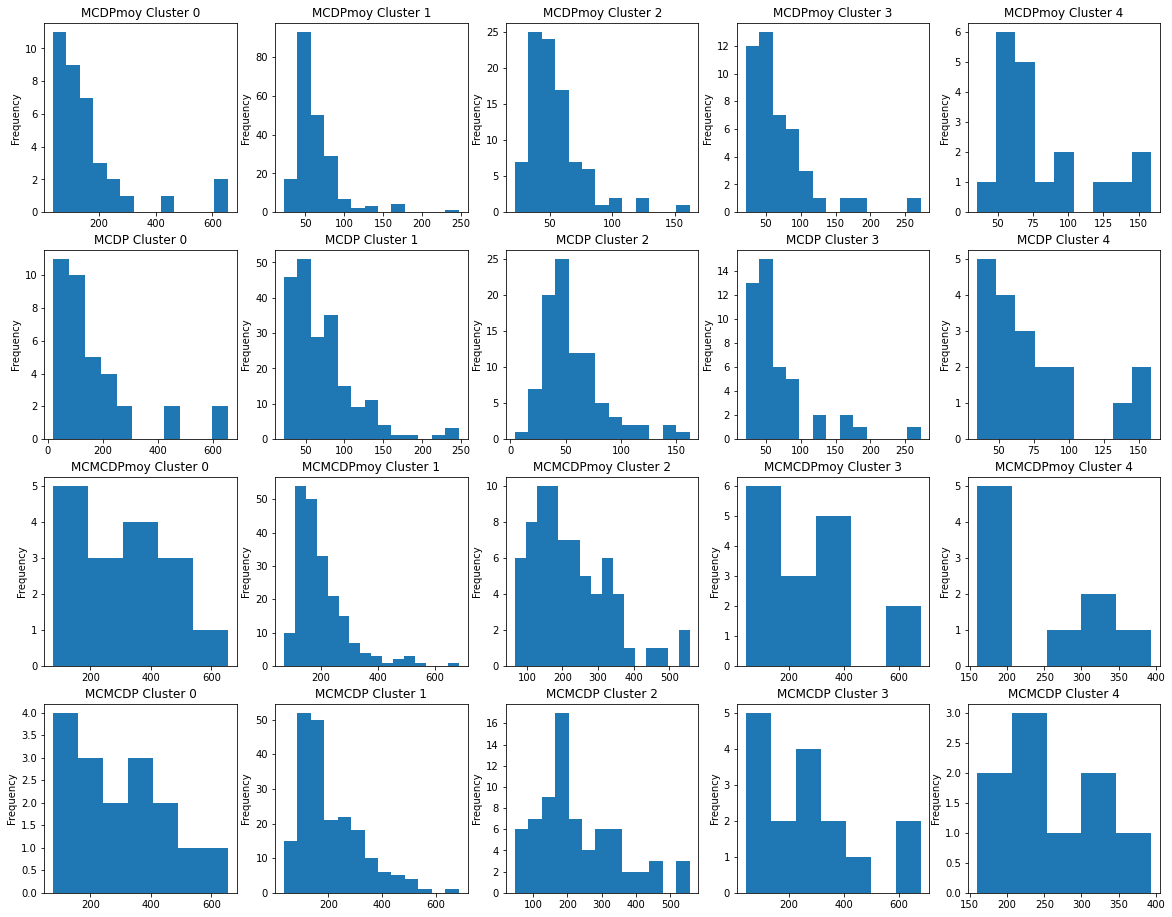

In [4]:
plt.figure(1, figsize=(20,16))
bins1 = [13,13,13,13,9]
for i in range(0,5):
    plt.subplot(4,5,i+1)
    df[df['clusterID'] == i]['mcdpmoy'].plot.hist(bins=bins1[i])
    plt.title("MCDPmoy Cluster {}".format(i))
bins2 = [11,13,13,13,9]
for i in range(0,5):
    plt.subplot(4,5,5+i+1)
    df[df['clusterID'] == i]['mcdp'].plot.hist(bins=bins2[i])
    plt.title("MCDP Cluster {}".format(i))
bins3 = [5,16,16,5,5]
for i in range(0,5):
    plt.subplot(4,5,10+i+1)
    df[df['clusterID'] == i]['mcmcdpmoy'].plot.hist(bins=bins3[i])
    plt.title("MCMCDPmoy Cluster {}".format(i))
bins4 = [7,13,13,7,5]
for i in range(0,5):
    plt.subplot(4,5,15+i+1)
    df[df['clusterID'] == i]['mcmcdp'].plot.hist(bins=bins4[i])
    plt.title("MCMCDP Cluster {}".format(i))

In [5]:
util.histo(df, bins1, 'mcdpmoy')

[([38.0,
   85.46153846153845,
   132.9230769230769,
   180.3846153846154,
   227.84615384615384,
   275.30769230769226,
   322.7692307692308,
   370.2307692307692,
   417.6923076923077,
   465.15384615384613,
   512.6153846153845,
   560.0769230769231,
   607.5384615384615,
   655.0],
  [16, 9, 7, 3, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0]),
 ([22.5,
   39.769230769230774,
   57.03846153846154,
   74.3076923076923,
   91.57692307692308,
   108.84615384615385,
   126.11538461538461,
   143.3846153846154,
   160.65384615384616,
   177.92307692307693,
   195.1923076923077,
   212.46153846153848,
   229.73076923076923,
   247.0],
  [17, 93, 50, 29, 7, 2, 3, 0, 4, 0, 0, 0, 1, 0]),
 ([22.0,
   32.769230769230774,
   43.53846153846154,
   54.30769230769231,
   65.07692307692308,
   75.84615384615385,
   86.61538461538461,
   97.38461538461539,
   108.15384615384616,
   118.92307692307693,
   129.6923076923077,
   140.46153846153845,
   151.23076923076923,
   162.0],
  [141, 25, 24, 17, 7, 6, 1, 2, 0, 

Calcul des coefficients

In [6]:
histoMCDPmoy = util.histo(df, bins1, 'mcdpmoy')
valeursHistoMCDPmoy = [util.getHistoValues(h) for h in histoMCDPmoy]
histoMCDP = util.histo(df, bins2, 'mcdp')
valeursHistoMCDP = [util.getHistoValues(h) for h in histoMCDP]
histoMCMCDPmoy = util.histo(df, bins3, 'mcmcdpmoy')
valeursHistoMCMCDPmoy = [util.getHistoValues(h) for h in histoMCMCDPmoy]
histoMCMCDP = util.histo(df, bins4, 'mcmcdp')
valeursHistoMCMCDP = [util.getHistoValues(h) for h in histoMCMCDP]

In [33]:
df['f'] = np.nan
df['DeltaDate'] = df['DeltaDate'].fillna(1000.0)
df['DeltaDateMC'] = df['DeltaDateMC'].fillna(1000)
vH = pd.DataFrame(valeursHistoMCDPmoy[0])
vH

,classes,hauteurs
0,38.000000,16
1,85.461538,9
2,132.923077,7
3,180.384615,3
4,227.846154,2
5,275.307692,1
6,322.769231,0
7,370.230769,0
8,417.692308,1
9,465.153846,0


In [48]:
df = df.sort_values(by='DeltaDate')
# pd.merge_asof(df, vH, left_on = 'DeltaDate', right_on = 'classes', direction='backward')[['titre', 'artiste', 'DeltaDate', 'classes', 'hauteurs']].sample(5)
df = pd.merge_asof(df, vH, left_on = 'DeltaDate', right_on = 'classes', direction='backward')
df['f'] = df['hauteurs']
df = df.drop(columns=['classes', 'hauteurs'])
df['f'].fillna(0)
df[['titre', 'artiste', 'DeltaDate', 'f']].sample(5)

,titre,artiste,DeltaDate,f
293,Dis-moi,BB Brunes,66.0,16.0
294,Elle habite ici,De Palmas Gérald,66.0,16.0
205,Le temps qui court,Chamfort Alain,44.0,16.0
277,Quelque chose de Tennessee,Hallyday Johnny,58.0,16.0
498,Et maintenant,Bécaud Gilbert,208.0,3.0


In [8]:
df = util.scoreHisto(df, 'f', valeursHistoMCDPmoy, 'DeltaDate')
df

ValueError: DataFrame constructor not properly called!

In [ ]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCDP['classes'])
taille_ech = sum(valeursHistoMCDP['hauteurs'])
df['g'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDate'][i] > valeursHistoMCDP['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['g'][i] = valeursHistoMCDP['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592,0.349633
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890,0.014670
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890,0.491443
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340,0.024450
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164,0.349633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890,0.004890
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164,0.349633
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890,0.014670
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890,0.491443


In [ ]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCMCDPmoy['classes'])
taille_ech = sum(valeursHistoMCMCDPmoy['hauteurs'])
df['h'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDateMC'][i] > valeursHistoMCMCDPmoy['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['h'][i] = valeursHistoMCMCDPmoy['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592,0.349633,0.053790
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890,0.014670,0.004890
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890,0.491443,0.246944
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340,0.024450,0.246944
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164,0.349633,0.246944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890,0.004890,0.246944
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164,0.349633,0.009780
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890,0.014670,0.176039
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890,0.491443,0.246944


In [ ]:
taille = df.shape[0]
nb_classes = len(valeursHistoMCMCDP['classes'])
taille_ech = sum(valeursHistoMCMCDP['hauteurs'])
df['i'] = np.nan

for i in range(taille):
    classe = 0
    while df['DeltaDateMC'][i] > valeursHistoMCMCDP['classes'][classe] and classe < nb_classes-1:
        classe += 1
    df['i'][i] = valeursHistoMCMCDP['hauteurs'][classe-1]/taille_ech

df

C:\Users\thoma\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h,i
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592,0.349633,0.053790,0.066015
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890,0.014670,0.004890,0.004890
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890,0.491443,0.246944,0.295844
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340,0.024450,0.246944,0.295844
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164,0.349633,0.246944,0.295844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890,0.004890,0.246944,0.295844
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164,0.349633,0.009780,0.029340
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890,0.014670,0.176039,0.168704
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890,0.491443,0.246944,0.295844


In [ ]:
df['score'] = df['f']*df['g']*df['h']*df['i']*10000
df

,titre,artiste,année,nbpassages,nb_mots,mcdpmoy,mcdp,mcmcdpmoy,mcmcdp,DeltaDate,DeltaDateMC,f,g,h,i,score
0,Siffler sur la colline,Dassin Joe,1968.0,2,NaN,42.5,42.0,137.0,137.0,60.0,258,0.662592,0.349633,0.053790,0.066015,8.226186
1,Donne-moi le temps,Jenifer,2002.0,3,NaN,86.0,126.0,358.0,126.0,231.0,5,0.004890,0.014670,0.004890,0.004890,0.000017
2,La madrague,Bardot Brigitte,1962.0,1,NaN,61.0,61.0,NaN,NaN,6.0,74,0.004890,0.491443,0.246944,0.295844,1.755657
3,C'est écrit,Cabrel Francis,1989.0,3,NaN,119.5,107.0,325.0,210.0,183.0,76,0.029340,0.024450,0.246944,0.295844,0.524077
4,Les planètes,M. Pokora,2019.0,2,296.0,47.5,43.0,628.0,628.0,99.0,56,0.237164,0.349633,0.246944,0.295844,60.578886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,Les copains d'abord,Brassens Georges,1964.0,2,NaN,54.5,34.0,507.0,507.0,3.0,82,0.004890,0.004890,0.246944,0.295844,0.017469
405,Libertine,Farmer Mylène,1986.0,2,NaN,108.0,79.0,175.0,175.0,73.0,416,0.237164,0.349633,0.009780,0.029340,0.237934
406,Belinda,François Claude,1972.0,2,NaN,70.0,82.0,538.0,538.0,224.0,142,0.004890,0.014670,0.176039,0.168704,0.021304
407,Au soleil,Jenifer,2002.0,2,NaN,68.0,42.0,42.0,42.0,15.0,64,0.004890,0.491443,0.246944,0.295844,1.755657


In [ ]:
df = df.sort_values(by='score', ascending=False)
df.to_csv('test.csv', sep=";", encoding='utf8')
# np.where(df['titre'] == 'Ça fait mal')[0][0]
